**Chinking:** Chunking means grouping something, Chinking means removing something.

Especially, When it's a case like I want it to consist this, this and this but I don't want this part in it.

In [1]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer #PunktSentenceTokenizer is an unsupervised machine learning sentence tokenizer
nltk.download('state_union')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
tokenized = custom_sent_tokenizer.tokenize(sample_text)
print(tokenized)

["PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 31, 2006\n\nTHE PRESIDENT: Thank you all.", 'Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.', 'Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King.', '(Applause.)', 'President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan.', '31, 2006.', "White House photo by Eric DraperEvery time I'm invited to this rostrum, I'm humbled by the privilege, and mindful of the history we've seen together.", 'We have gathered under this Capitol dome in moments of national mourning and national achievemen

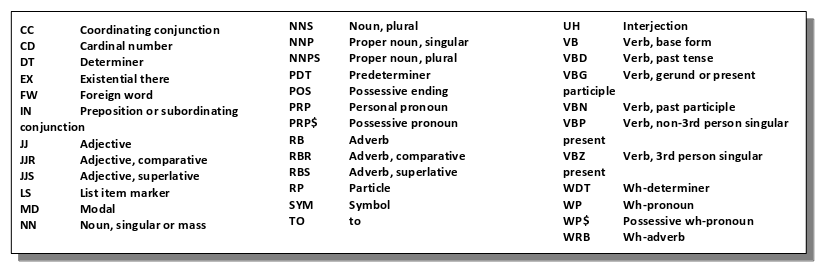

In [8]:
def process_content():
  try:
    for i in tokenized:
      words=nltk.word_tokenize(i)
      #print(words)
      tagged = nltk.pos_tag(words)
      #print(tagged)
      #We just want more and more of just anything. Here, RB = Adverb, NNP = Proper noun, NN = Noun
      #. = Match any character, * = Match 0 or more repetitions, + = Match 1 or more repetitions
      chunkGram = r'''Chunk: {<.*>+}  
                                      }<VB.?|IN|DT>+{'''   
      #VB = Verb, IN = preposition, DT = Determiner
      chunkParser = nltk.RegexpParser(chunkGram) #Parse via this chunkgram using regular expression
      chunked = chunkParser.parse(tagged) #Parsing the chunk [Kinda like JSON parser of Flutter]
      #print(chunked) #We are looking for "Chunk"
      for i in chunked:
        #print(i) #Uncomment it to see everything 
        i = str(i)
        #print(i[0:6])
        if i[1:6] == 'Chunk':    #We only want the tupless with "Chunk" before
          print(i[7:-1])   
  except Exception as e :
    #pass
    print(str(e)) 

process_content()

PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP 'S/POS ADDRESS/NNP
A/NNP JOINT/NNP SESSION/NNP
THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP
  THE/NNP
  UNION/NNP
  January/NNP
  31/CD
  ,/,
  2006/CD
  THE/NNP
  PRESIDENT/NNP
  :/:
  Thank/NNP
  you/PRP
./.
  Mr./NNP
  Speaker/NNP
  ,/,
  Vice/NNP
  President/NNP
  Cheney/NNP
  ,/,
  members/NNS
Congress/NNP ,/, members/NNS
  Supreme/NNP
  Court/NNP
  and/CC
  diplomatic/JJ
  corps/NN
  ,/,
  distinguished/JJ
  guests/NNS
  ,/,
  and/CC
  fellow/JJ
  citizens/NNS
  :/:
our/PRP$ nation/NN
,/, graceful/JJ ,/, courageous/JJ woman/NN who/WP
America/NNP to/TO its/PRP$ founding/NN ideals/NNS and/CC
noble/JJ dream/NN ./.
Tonight/NN we/PRP
hope/NN
glad/JJ reunion/NN
husband/NN who/WP
so/RB long/RB ago/RB ,/, and/CC we/PRP
grateful/JJ
good/JJ life/NN
Coretta/NNP Scott/NNP King/NNP ./.
(/( Applause/NNP ./. )/)
President/NNP George/NNP W./NNP Bush/NNP
to/TO
his/PRP$ State/NNP
Union/NNP Address/NNP
Capitol/NNP ,/, Tuesday/NNP ,/, Jan/NNP ./.
31/CD ,/, 2